# Heatmap 
- using padj < 0.01 as the cutoff for the current analysis

In [1]:
# Let the middle rows included.
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [48]:
library(ggplot2)
library(dplyr)
library(NMF)
library(RColorBrewer)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(glue)

In [49]:
feat_df <- read.table("../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/updPS_sel_one_wayANOVA_hMinImp_TICnorm_groupFil0.3_RPneg_fullreport.csv"
        ,header = TRUE, sep = ',')

In [50]:
head(feat_df)

,X,formula,neutral_mass,short_name,mz,rtime,apex.scan.number.,X.EmpCpd.interim_id,gMean_Tn,gMean_CD8stem,gMean_CD8trans,gMean_CD8TD,log2FC_CD8stemvsTn,log2FC_CD8transvsTn,log2FC_CD8TDvsTn,log2FC_CD8transvsCD8stem,log2FC_CD8TDvsCD8stem,log2FC_CD8TDvsCD8trans,f_score,pval,padj,Tpadj_CD8TD.CD8stem,Tpadj_CD8trans.CD8stem,Tpadj_Tn.CD8stem,Tpadj_CD8trans.CD8TD,Tpadj_Tn.CD8TD,Tpadj_Tn.CD8trans,TFDR_CD8TD.CD8stem,TFDR_CD8trans.CD8stem,TFDR_Tn.CD8stem,TFDR_CD8trans.CD8TD,TFDR_Tn.CD8TD,TFDR_Tn.CD8trans,CD8TD_750K_1,CD8TD_750K_2,CD8stem_250K_1,CD8stem_300K_2,CD8trans_250K_2,CD8trans_350K_1,Tn_250K_1,Tn_250K_2,pooled_1,pooled_2,pooled_3
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F14243,C49H84NO10P,877.5833,PS 43:6,876.5717,369.4913,1702,kp2224_816.6371,19.76150,19.76150,20.23326,21.37256,0.00000000,0.47176688,1.611064198,0.47176688,1.61106420,1.13929732,10.0632353,0.02464045,0.1417891,0.02995087,0.5633747,1.00000000,0.09007349,0.02995087,0.56337468,0.2545142,1,1.0000000,0.4319209,0.1962066,1.00000,21.45696,21.28816,19.76150,19.76150,20.70503,19.76150,19.76150,19.76150,19.76150,19.76150,19.76150
2,F13352,C42H80NO10P,789.5520,PS 36:1,788.5445,303.1666,1383,kp2474_789.5517,18.84580,17.39546,17.39546,17.39546,-1.45034554,-1.45034554,-1.450345541,0.00000000,0.00000000,0.00000000,12.6506497,0.01649395,0.1181834,1.00000000,1.0000000,0.02469405,1.00000000,0.02469405,0.02469405,1.0000000,1,0.8957117,1.0000000,0.1786339,0.82805,17.39546,17.39546,17.39546,17.39546,17.39546,17.39546,19.25357,18.43803,17.39546,17.39546,17.39546
3,F13353,C42H80NO10P,789.5520,PS 36:1,788.5445,343.8197,1578,kp2475_789.5519,21.00710,17.46887,14.23926,17.72032,-3.53823712,-6.76784103,-3.286785799,-3.22960391,0.25145132,3.48105523,1.3559003,0.37573043,0.5605155,0.99982346,0.7772844,0.73189371,0.74040179,0.76898926,0.31716939,1.0000000,1,1.0000000,1.0000000,1.0000000,1.00000,21.20137,14.23926,20.69847,14.23926,14.23926,14.23926,21.07399,20.94022,21.19110,14.23926,14.23926
4,F13354,C42H80NO10P,789.5520,PS 36:1,788.5445,382.5181,1765,19038,17.32933,17.26884,16.32400,18.40433,-0.06048903,-1.00532064,1.075009393,-0.94483161,1.13549843,2.08033003,0.5540680,0.67240039,0.7521236,0.89125566,0.9316984,0.99997788,0.61436109,0.90504249,0.91984490,1.0000000,1,1.0000000,1.0000000,1.0000000,1.00000,20.48466,16.32400,18.21367,16.32400,16.32400,16.32400,17.29207,17.36658,17.56723,16.32400,16.32400
5,F7394,C34H66NO10P,679.4424,PS 28:0,678.4377,208.1130,935,kp1221_678.4415,21.00924,21.28406,21.33476,20.11014,0.27481636,0.32552069,-0.899103016,0.05070433,-1.17391938,-1.22462371,2.1849849,0.23238826,0.4354320,0.27569207,0.9996590,0.95348611,0.25190461,0.44619363,0.92725658,0.6708901,1,1.0000000,0.7261192,0.8228638,1.00000,19.54137,20.67891,21.24867,21.31945,21.63505,21.03447,20.59031,21.42817,20.62738,20.73487,20.80059
6,F7395,C34H66NO10P,679.4424,PS 28:0,678.4377,308.5315,1409,kp1222_678.4415,21.49617,21.45639,21.54854,21.48639,-0.03978145,0.05236782,-0.009779883,0.09214927,0.03000156,-0.06214771,0.4550391,0.72811777,0.7908672,0.97998287,0.6857284,0.95625313,0.86347754,0.99924939,0.91012775,1.0000000,1,1.0000000,1.0000000,1.0000000,1.00000,21.49334,21.47945,21.38956,21.52322,21.56036,21.53672,21.58724,21.40511,21.24070,21.31424,21.53164


In [51]:
feat_df = feat_df[!duplicated(feat_df$X),]

In [52]:
dim(feat_df)

[1] 104  44

In [93]:
library(dplyr)

feat_df = feat_df %>%
  mutate(surrogate = paste(short_name, round(rtime,2), sep = "_"))

rownames(feat_df) = feat_df$surrogate

In [95]:
rownames(feat_df)[1:5]

[1] "PS 43:6_369.49" "PS 36:1_303.17" "PS 36:1_343.82" "PS 36:1_382.52"
[5] "PS 28:0_208.11"

In [96]:
meta_df <- read.table("../../../../seq/RPneg_addgrp.csv",
                     header = TRUE, sep = ',') 

In [97]:
head(meta_df,5)

,Sample.Type,File.Name,Sample.ID,Sample_ID_upd,cell_number,group,Comment,Path,Instrument.Method,Process.Method,Position,Inj.Vol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<lgl>,<chr>,<int>
1,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
2,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,NR,Blank,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A1,2
3,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,NR,Blank_std,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A2,2
4,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2
5,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,NR,Qstd,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylserine\20230308_sample_analysis\HILICpos_RPneg,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM_method\20220322_MT_RPneg_Aria_FS_60Kres_20min_PS,NA,G:A3,2


In [98]:
sample_names = colnames(feat_df)[grepl('(Tn|CD8stem|CD8TD|CD8trans)\\_[0-9]+',colnames(feat_df))]
sample_names
length(sample_names)
padj_columns = colnames(feat_df[grepl('padj',colnames(feat_df))]);padj_columns

[1] "CD8TD_750K_1"    "CD8TD_750K_2"    "CD8stem_250K_1"  "CD8stem_300K_2" 
[5] "CD8trans_250K_2" "CD8trans_350K_1" "Tn_250K_1"       "Tn_250K_2"

[1] 8

[1] "padj"                   "Tpadj_CD8TD.CD8stem"    "Tpadj_CD8trans.CD8stem"
[4] "Tpadj_Tn.CD8stem"       "Tpadj_CD8trans.CD8TD"   "Tpadj_Tn.CD8TD"        
[7] "Tpadj_Tn.CD8trans"

In [99]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [100]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[meta_df$Sample_ID_upd %in% sample_names,]

# Define filtering level - pval

In [101]:
filtered_level = 0.05
feat_df.filt = feat_df[feat_df$pval < filtered_level & !is.na(feat_df$pval),]

In [102]:
dim(feat_df.filt)

[1] 47 45

## subset datatable with only data values

In [103]:
feat_df.filt.data = feat_df.filt[sample_names]

# Plot heatmap wrapper function

In [104]:
feat_df.filt.data.scale <- t(scale(t(feat_df.filt.data)))

In [105]:
range(feat_df.filt.data.scale, na.rm = TRUE)

[1] -1.911287  2.118691

#### columns and rows annotation

In [106]:
colnames(meta_df)

[1] "Sample.Type"       "File.Name"         "Sample.ID"        
 [4] "Sample_ID_upd"     "cell_number"       "group"            
 [7] "Comment"           "Path"              "Instrument.Method"
[10] "Process.Method"    "Position"          "Inj.Vol"

In [107]:
unique(meta_df$group)

[1] "Tn"       "CD8stem"  "CD8trans" "CD8TD"

## Since the metadata is not exclusively the data 

In [108]:
rownames(meta_df) = meta_df$Sample_ID_upd

In [109]:
# since the row names are the sample.ID used in data colnames
meta_df = meta_df[sample_names,]

In [110]:
assign_values4annot <- function(df = feat_df.filt.data.scale, 
                                meta_column_name = 'group') {  
    Var_vec = colnames(df)
    for (factor_level in unique(meta_df[,meta_column_name])) {
        Var_vec[Var_vec %in% 
                 rownames(meta_df[meta_df[,meta_column_name] == factor_level,])] = factor_level
        }
    return(Var_vec)
}

In [111]:
Var1_vec = assign_values4annot(feat_df.filt.data.scale, 'group')

In [112]:
annotation_col = data.frame(group = Var1_vec)
rownames(annotation_col) = colnames(feat_df.filt.data.scale)                            

# annotation_col = data.frame(illness_duration = Var1_vec, 
#                             gender = Var2_vec, 
#                             age = Var3_vec)
# rownames(annotation_col) = colnames(feat_df.filt.data.scale)

In [113]:
# since age is continuous measure (integers), needs to convert to integers
# annotation_col$age = as.integer(annotation_col$age)

In [114]:
annotation_col$group

[1] "CD8TD"    "CD8TD"    "CD8stem"  "CD8stem"  "CD8trans" "CD8trans" "Tn"      
[8] "Tn"

#### Annotation of rows (here don't have these)

In [115]:
# panel_vec = sapply(strsplit(rownames(feat_df.filt.data.scale),"_",1),function(x)x[1])
# annotation_row = data.frame(panel = panel_vec) 
# rownames(annotation_row) = rownames(feat_df.filt.data.scale)

## Assign colors

In [116]:
group = c("#888888","#0000ff","#FFA500","#ff0000")
names(group) = c("Tn","CD8stem","CD8trans","CD8TD")

# gender = c("#FF7A33", "#33D7FF")
# names(gender) = c("Female","Male")

In [117]:
ann_colors = list(group = group)
# ann_colors = list(illness_duration = illness_duration, 
#                   gender = gender,
#                   age = age
#                  )

In [118]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.911287  2.118691

In [119]:
feat_df.filt.data.scale[feat_df.filt.data.scale < -2] = -2.1
feat_df.filt.data.scale[feat_df.filt.data.scale > 2] = 2.1

In [120]:
range(feat_df.filt.data.scale) #check the range of z_transformed

[1] -1.911287  2.100000

In [121]:
breaksList = seq(range(feat_df.filt.data.scale)[1],
                 range(feat_df.filt.data.scale)[2],
                 length.out = 100) 

quantile_breaks <- function(xs, n = 100) {
  breaks <- quantile(xs, probs = seq(0, 1, length.out = n))
  breaks[!duplicated(breaks)]
}

mat_breaks <- quantile_breaks(feat_df.filt.data.scale, n = 101)
cell_colors <- colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))(length(mat_breaks))

In [122]:
# options(repr.plot.width=30, repr.plot.height=30, res=300)
# pheatmap(feat_df.filt.data.NA.scale.rplNAmin, cluster_rows = TRUE, show_rownames = TRUE, cluster_cols = TRUE, 
#          annotation_col = annotation_col, annotation_row = annotation_row, clustering_method = "complete", 
#          cellwidth = 5,cellheight = 10, annotation_colors = ann_colors,
#          color = cell_colors)

In [123]:
out_dir = "../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/PSonly_heatmap_upd/"
dir.create(out_dir)

exp_label = 'hMinImp_TICnorm_HILICpos_1wayANOVA'
out_pdf_file = file.path(out_dir, glue("{exp_label}_pval{filtered_level}_heatmap.pdf"))

Warning message in dir.create(out_dir):
“'../../../output/hMinImp_TICnorm_groupFil0.3_RPneg_1wayANOVA/PSonly_heatmap_upd' already exists”


In [124]:
ann_colors

$group
       Tn   CD8stem  CD8trans     CD8TD 
"#888888" "#0000ff" "#FFA500" "#ff0000"

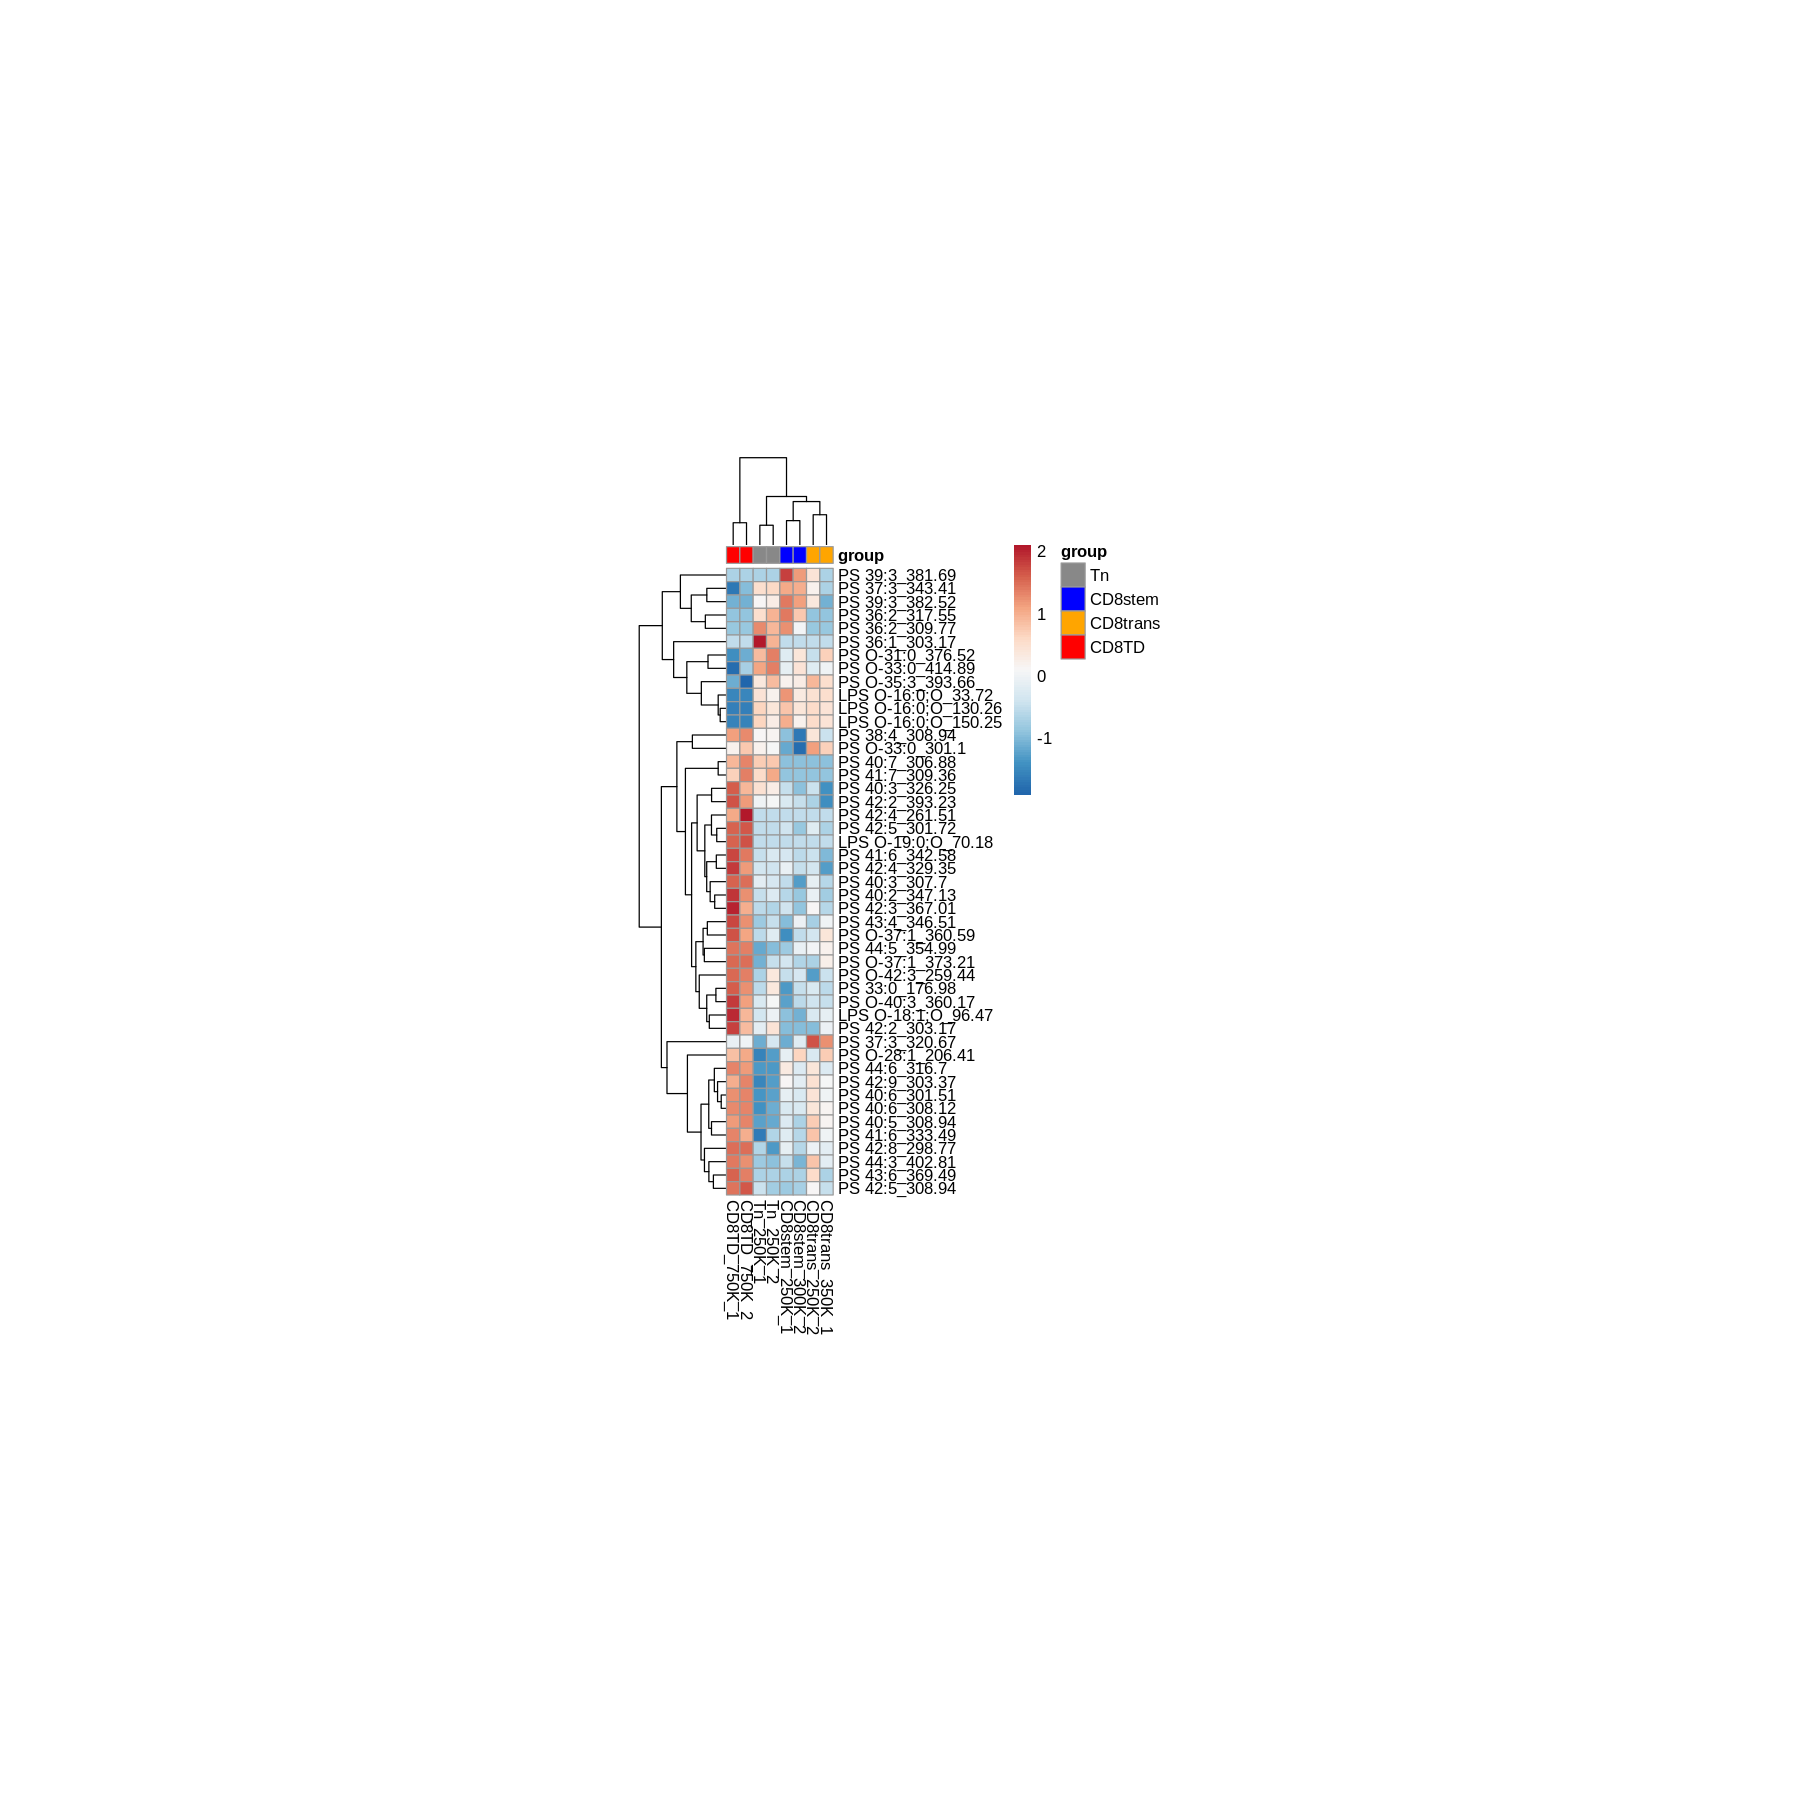

In [125]:
figure_width = 15
figure_height = 15
options(repr.plot.width = figure_width, repr.plot.height = figure_height, res = 300)
library(pheatmap)
p <- pheatmap(feat_df.filt.data.scale,  # data file
         cluster_rows = TRUE, 
         show_rownames = TRUE, 
         cluster_cols = TRUE, 
         annotation_col = annotation_col, 
         clustering_method = "mcquitty",
         cellwidth = 8,
         cellheight = 8,
         color = cell_colors,
         annotation_colors = ann_colors)
ggsave(p, file = out_pdf_file, width = figure_width, height = figure_height, )

-----